In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

## Loading data Set

In [120]:
training_dataset = pd.read_csv("train.csv")

## Dimensions of Traning Data Set

In [123]:
training_dataset.shape

(362, 17)

In [17]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     362 non-null    int64  
 1   surface_area                   362 non-null    float64
 2   agricultural_land              358 non-null    float64
 3   forest_area                    357 non-null    float64
 4   armed_forces_total             318 non-null    float64
 5   urban_pop_major_cities         360 non-null    float64
 6   urban_pop_minor_cities         360 non-null    float64
 7   national_income                362 non-null    object 
 8   inflation_annual               146 non-null    float64
 9   inflation_monthly              156 non-null    float64
 10  inflation_weekly               20 non-null     float64
 11  mobile_subscriptions           362 non-null    object 
 12  internet_users                 362 non-null    obj

In [19]:
training_dataset.size

6154

## Explore Columns

In [22]:
# Display Max becuase sometimes not show all column thats why we use display.max
pd.set_option("display.max_columns",None)
training_dataset.head()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


## Description

In [25]:
training_dataset.describe()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,362.000000,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,231.455801,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,134.799202,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,0.000000,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,116.250000,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,233.500000,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,349.750000,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,461.000000,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


## Data Types

In [28]:
training_dataset.dtypes

Unnamed: 0                         int64
surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

## Head And Tail 
# Head

In [31]:
training_dataset.head()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


# Tail

In [34]:
training_dataset.tail()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
357,457,243610.0,1.736999e+07,3.131596e+06,159150.0,42.818424,39.273576,high,2.554547,NaN,NaN,more than 1 per person,90 per 100 people,1.193275e+09,very high access,[0%-25%),80.956098
358,458,9831510.0,4.357576e+08,3.326943e+08,1433150.0,22.948363,58.328637,very high,1.464833,NaN,NaN,less than 1 per person,84 per 100 people,1.304449e+09,very high access,[0%-25%),78.841463
359,459,176220.0,1.446148e+07,1.811858e+06,25450.0,92.409069,2.573931,medium high,NaN,0.714595,NaN,more than 1 per person,58 per 100 people,7.511805e+07,very high access,[0%-25%),76.836195
360,460,330972.0,1.160670e+07,1.549346e+07,522000.0,27.411815,4.897185,low,NaN,0.549355,NaN,more than 1 per person,44 per 100 people,8.159726e+06,medium access,[0%-25%),75.756488
361,461,350.0,4.000000e+03,1.782000e+04,NaN,32.291719,62.772281,unknown,NaN,NaN,NaN,unknown,45 per 100 people,4.010044e+08,very high access,unknown,79.624390


## Checking Null and Missing values

In [37]:
training_dataset.isnull()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,False,False,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
358,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
359,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
360,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False


## Checking Missing values in each Column

In [40]:
training_dataset.isnull().sum()

Unnamed: 0                         0
surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

## Change Data types

#### First we named the first column which is "id".
#### The two column which is "national_income" and "improved_sanitation" is both category.
#### The "internet_user" is string to convert into numeric we use library re to get the numeric value and add
#### The two column which is "mobile_subscriptions" and women_parliments_seats_rate change the string into numeric form with use map.

In [125]:
class Change_data_types():
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X.rename(columns ={'Unnamed: 0': 'id'}, inplace = True)
        X['national_income'] = X['national_income'].astype("category")
        X['improved_sanitation'] = X['improved_sanitation'].astype("category")
        X['internet_users'] = X['internet_users'].apply(convert_internet_users)
        subscription_mapping = {
            "less than 1 per person": 0.5,
            "more than 1 per person": 1.5,
            "more than 2 per person": 2.5,
            "more than 3 per person": 3.5,
            "unknown": None
        }
        X['mobile_subscriptions'] = X['mobile_subscriptions'].map(subscription_mapping)
        mapping_parliment_seats = {
            "[0%-25%)": 12.5,
            "[25%-50%)": 37.5,
            "[50%-75%)": 62.5,
            "unknown":0
        }
        X["women_parliament_seats_rate"] = X["women_parliament_seats_rate"].map(mapping_parliment_seats)
        return X
def convert_internet_users(value):
        numbers = re.findall(r'\d+', str(value))
        if len(numbers) == 2:
            return int(numbers[0]) + int(numbers[1])
        elif len(numbers) == 1:
            return None
        return None

## label Encoding
## Compare Actual and Encoded Labels

#### There is two column "national_income" and "improved_sanitation" to conver the Actual data into label encoding
#### we can also do with one hot encoding but there is use more column and become complex thats why we use label encoding

In [129]:
class Label_encoding():
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        national_income_encoding={
            "very low":1,
            "low":2,
            "medium low":3,
            "medium high":4,
            "high":5,
            "very high":6,
            "unknown":0
        }
        improved_sanitation_encoding={
            "very low access": 1,
            "low access": 2,
            "medium access": 3,
            "high access": 4,
            "very high access": 5,
            "no info": 0
        }
        X["national_income"]=X["national_income"].map(national_income_encoding)
        X["improved_sanitation"]=X["improved_sanitation"].map(improved_sanitation_encoding)
        return X

## Deal with Missing values

#### There are 6 column we use means to fill Nan value because the ratio of missing value less and outliers also low we can easily do that.
#### But there is 3 Column we use Machine learning model KNN to fill the Nan value due to the ratio in these column is high.
#### The KNN model is best and we set n_neighbors=5 we set more than also five but we get good accuracy with these neighbors.

In [133]:
class Missing_value():
    def fit(Self,X,y=None):
        return Self
    def transform(Self,X):
        mean_value = X['agricultural_land'].mean()
        X["agricultural_land"] = X['agricultural_land'].fillna(value=mean_value)
        mean_value = X['forest_area'].mean()
        X["forest_area"] = X['forest_area'].fillna(value=mean_value)
        mean_value = X['armed_forces_total'].mean()
        X["armed_forces_total"] = X['armed_forces_total'].fillna(value=mean_value)
        mean_value = X['urban_pop_major_cities'].mean()
        X["urban_pop_major_cities"] = X['urban_pop_major_cities'].fillna(value=mean_value)
        mean_value = X['urban_pop_minor_cities'].mean()
        X["urban_pop_minor_cities"] = X['urban_pop_minor_cities'].fillna(value=mean_value)
        mean_value = X['secure_internet_servers_total'].mean()
        X["secure_internet_servers_total"] = X['secure_internet_servers_total'].fillna(value=mean_value)
        mean_value = X['mobile_subscriptions'].mean()
        X["mobile_subscriptions"] = X['mobile_subscriptions'].fillna(value=mean_value)
        mean_value = X['internet_users'].mean()
        X["internet_users"] = X['internet_users'].fillna(value=mean_value)
        
        imputer = KNNImputer(n_neighbors=5)
        X[['inflation_annual']] = imputer.fit_transform(X[['inflation_annual']])
        X[['inflation_monthly']] = imputer.fit_transform(X[['inflation_monthly']])
        X[['inflation_weekly']] = imputer.fit_transform(X[['inflation_weekly']])
        return X

In [135]:
training_dataset_visualize = pd.read_csv("train.csv")
pipline_visualize = Pipeline([("Data_types",Change_data_types()),
                    ("Label_encoding",Label_encoding()),
                    ("Missing_value",Missing_value())])
training_dataset_visualize = pipline_visualize.fit_transform(training_dataset_visualize)

#### Population to improved sanitation with national_income

In [92]:
def bar_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_column, y=y_column)
    plt.title(f'Bar Plot of {y_column} by {x_column}')
    plt.show()

#### National income as ordinal categorical and year inflation Rate

In [95]:
def joint_plot(data, x_column, y_column):
    sns.jointplot(data=data, x=x_column, y=y_column, kind="scatter", height=8)
    plt.suptitle(f'Joint Plot of {x_column} and {y_column}', y=1.05)
    plt.show()

#### Mobile Subscription per person the average number of people using internet in range 100-1000 people

In [98]:
def box_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'Box Plot of {y_column} by {x_column}')
    plt.show()

####  The strength and direction of linear relationships between pairs of variables use for to find patterns of relationships among multiple variables.

In [101]:
def correlation_heatmap(data):
    plt.figure(figsize=(17, 13))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

#### A Distribution Plot shows the frequency distribution of a single variable use for to examine the spread, skewness, and modality 

In [104]:
def distribution_plot(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### PCA reduces the dimensionality of data by creating new "principal components" that capture most of the variation in the data and reveal clustering or patterns

In [107]:
def pca_biplot(data, columns, target_column):
    # Standardize the data
    X = data[columns].dropna()
    y = data[target_column].dropna()
    
    # Perform PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    
    # Create a scatter plot of the first two components
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(components[:, 0], components[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label=target_column)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Bi-Plot')
    
    # Plot the feature vectors
    for i, (comp_1, comp_2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, comp_1, comp_2, color='r', alpha=0.5)
        plt.text(comp_1 * 1.15, comp_2 * 1.15, columns[i], color='g', ha='center', va='center')
    
    plt.show()

#### Drop useless feature which is not effect on Data

In [137]:
class Drop_feature():
    def fit(Self,X,y=None):
        return Self
    def transform(Self,X):
        return X.drop(["forest_area","urban_pop_major_cities","inflation_annual","inflation_weekly","mobile_subscriptions"],axis=1)

#### Creating the Pipline

In [140]:
pipline = Pipeline([("Data_types",Change_data_types()),
                    ("Label_encoding",Label_encoding()),
                    ("Missing_value",Missing_value()),
                    ("Drop_Feature",Drop_feature())])

In [142]:
training_dataset = pipline.fit_transform(training_dataset)

#### To check all the missing value is fill.

In [145]:
training_dataset.isnull().sum()

id                               0
surface_area                     0
agricultural_land                0
armed_forces_total               0
urban_pop_minor_cities           0
national_income                  0
inflation_monthly                0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

#### Feature Selection with the help of correlation 

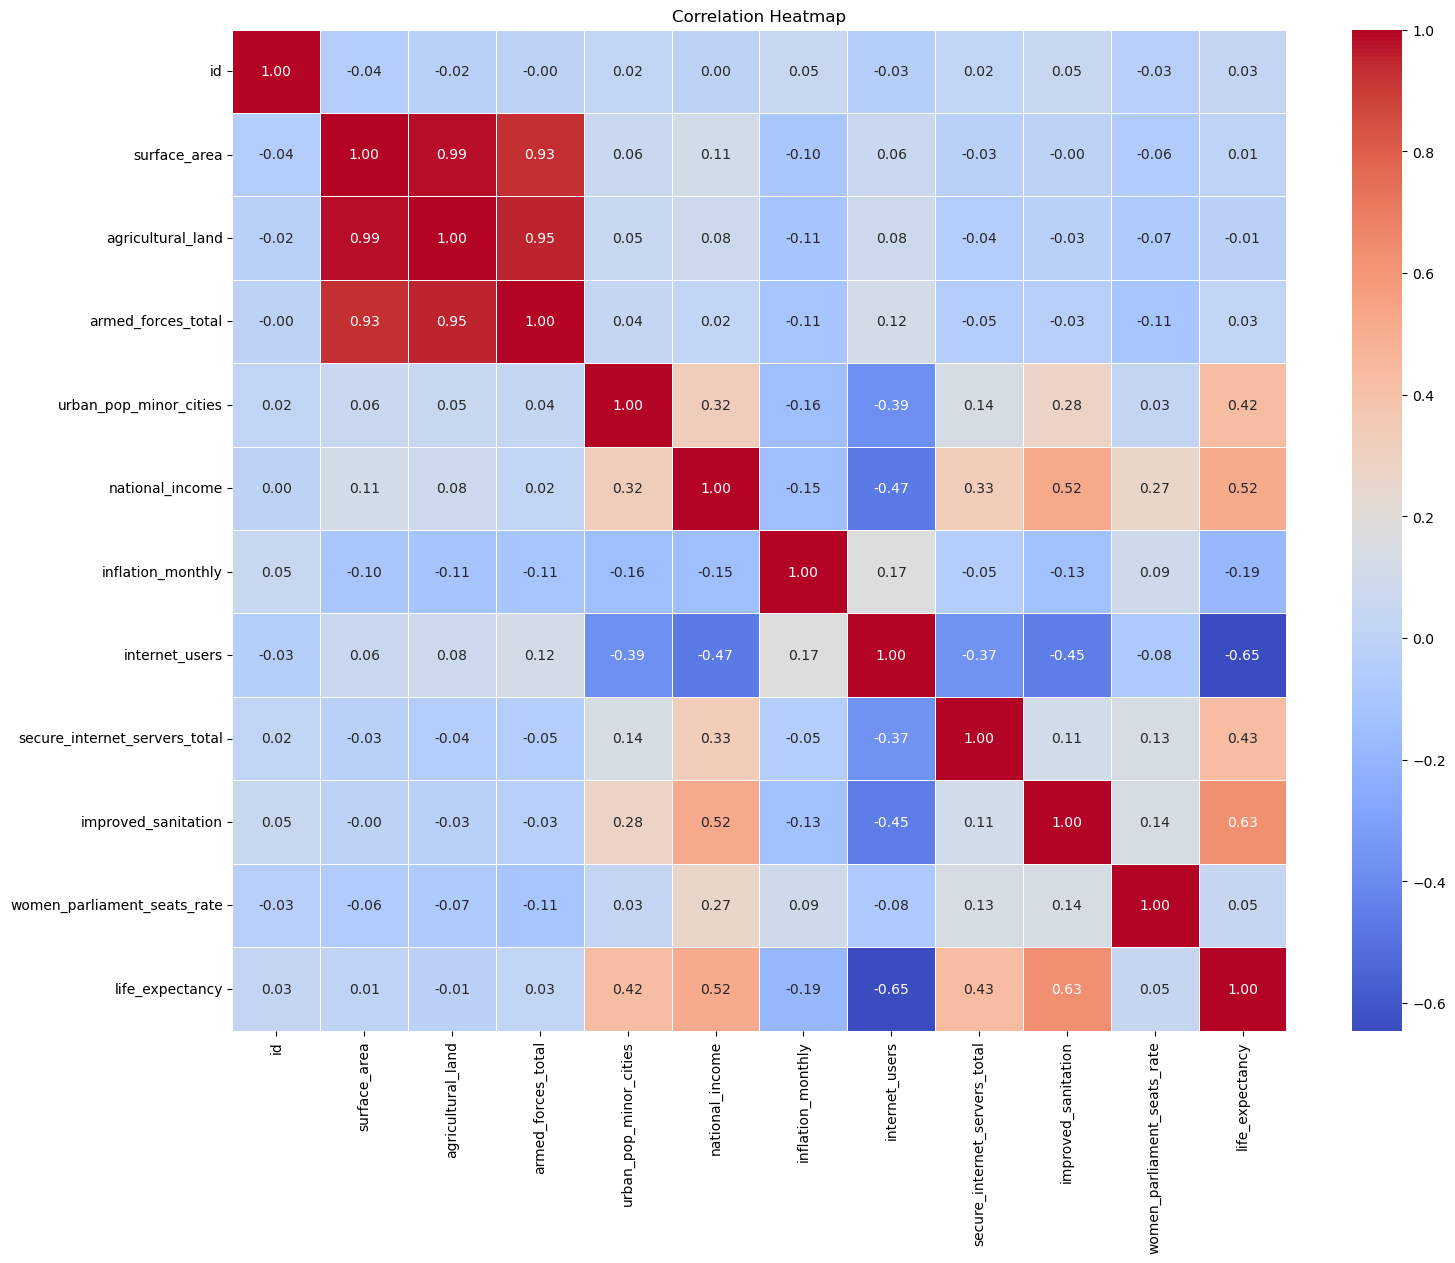

In [147]:
correlation_heatmap(training_dataset)

#### Input is X and y is predication we take that those feature value with target feature

In [150]:
X = training_dataset.drop(columns=["life_expectancy"])
y = training_dataset["life_expectancy"]

#### Spilt the Data to train and test

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standard scalar imporve the machine learning model to improve the performance.

In [156]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Simple appply random forest machine learning model

In [159]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7720786627906258

#### To check feature importance see also table and bar plot.

In [168]:
model.feature_importances_

array([0.02137972, 0.01835353, 0.02938597, 0.03680468, 0.0194278 ,
       0.00691858, 0.01667793, 0.48815668, 0.14075305, 0.21402781,
       0.00811424])

In [170]:
feature_importance = pd.DataFrame({
    "Feature":X.columns,
    "Importance":model.feature_importances_
    })
feature_importance

,Feature,Importance
0,id,0.021380
1,surface_area,0.018354
2,agricultural_land,0.029386
3,armed_forces_total,0.036805
4,urban_pop_minor_cities,0.019428
5,national_income,0.006919
6,inflation_monthly,0.016678
7,internet_users,0.488157
8,secure_internet_servers_total,0.140753
9,improved_sanitation,0.214028


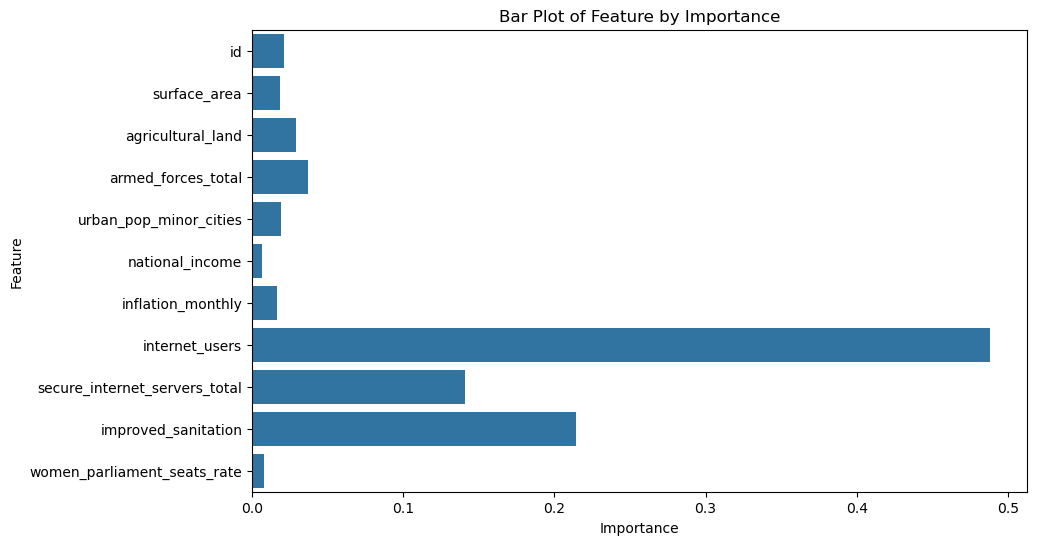

In [172]:
bar_plot(feature_importance,"Importance","Feature")

#### Second Linear regression model to check the accuracy

In [175]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6711272226816429

#### Spilt the Data Equal so testing could easily perform and show best result

In [200]:
y_binned = pd.cut(y, bins=5, labels=False)  # Bin the target to create approximate "strata"
split = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y_binned):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Machine learning model we use is Random forest and use GridSearchCV (CV means Cross Validation like train and test data set
#### Mixing to get better accuracy ). Grid Search use only small Data set (1000-30000) if use Large Dataset use RandomizedSearchCV(in million size of Data set)
#### also know as hypertunning

In [204]:
# Define a wider hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2
)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

#### Best Estimator

In [206]:
# Evaluate the best Random Forest model
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(n_estimators=50, random_state=42)

#### The r2_score library we use to get the accuracy of Machine Learning Model.

In [209]:
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared Score:", r2_rf)

Random Forest R-squared Score: 0.8137334530801175


#### Now testing on test data set

# Load test data

In [1475]:
testing_data = pd.read_csv("test.csv")

In [1477]:
testing_data

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
0,9,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
1,16,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
2,19,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
3,23,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
4,28,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,433,1267000.0,4.479261e+07,1.167076e+06,10700.0,10.700246,7.519754,very low,2.298522,NaN,NaN,less than 1 per person,17 per 1000 people,163409.0,very low access,[0%-25%)
96,441,11610.0,6.761000e+04,0.000000e+00,11800.0,97.972567,1.088433,very high,NaN,0.260964,NaN,more than 1 per person,85 per 100 people,167040406.0,very high access,[0%-25%)
97,443,2840.0,3.512367e+04,1.716042e+05,NaN,6.639330,12.800670,low,0.610086,NaN,NaN,less than 1 per person,153 per 1000 people,26261884.0,very high access,[0%-25%)
98,453,142550.0,4.965213e+06,4.188094e+05,16300.0,19.272272,7.348728,very low,NaN,NaN,NaN,less than 1 per person,160 per 1000 people,1232758.0,very high access,[0%-25%)


# Infromation of Test data

In [1480]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     100 non-null    int64  
 1   surface_area                   100 non-null    float64
 2   agricultural_land              96 non-null     float64
 3   forest_area                    95 non-null     float64
 4   armed_forces_total             83 non-null     float64
 5   urban_pop_major_cities         98 non-null     float64
 6   urban_pop_minor_cities         98 non-null     float64
 7   national_income                100 non-null    object 
 8   inflation_annual               43 non-null     float64
 9   inflation_monthly              37 non-null     float64
 10  inflation_weekly               6 non-null      float64
 11  mobile_subscriptions           100 non-null    object 
 12  internet_users                 100 non-null    obje

In [1482]:
testing_data.isnull().sum()

Unnamed: 0                        0
surface_area                      0
agricultural_land                 4
forest_area                       5
armed_forces_total               17
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 57
inflation_monthly                63
inflation_weekly                 94
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total     9
improved_sanitation               0
women_parliament_seats_rate       0
dtype: int64

In [1484]:
testing_data.shape

(100, 16)

# Pre processing Apply using Pipline

In [1487]:
testing_data = pipline.fit_transform(testing_data)

In [1489]:
testing_data

,id,surface_area,agricultural_land,armed_forces_total,urban_pop_minor_cities,national_income,inflation_monthly,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
0,9,322460.0,2.088892e+07,854473.216867,51.919416,2,0.431422,1084.0,1849926.0,1,12.5
1,16,513120.0,2.220651e+07,453550.000000,5.803190,2,0.431422,1289.0,17983312.0,5,12.5
2,19,18580.0,1.872230e+05,854473.216867,67.396944,0,0.431422,166.0,240458015.0,5,0.0
3,23,112490.0,3.252347e+06,20000.000000,4.934574,2,0.430158,1178.0,9427882.0,4,12.5
4,28,783560.0,3.911844e+07,612800.000000,28.635994,2,0.624424,146.0,50379814.0,5,12.5
...,...,...,...,...,...,...,...,...,...,...,...
95,433,1267000.0,4.479261e+07,10700.000000,7.519754,1,0.431422,1017.0,163409.0,1,12.5
96,441,11610.0,6.761000e+04,11800.000000,1.088433,5,0.260964,185.0,167040406.0,5,12.5
97,443,2840.0,3.512367e+04,854473.216867,12.800670,2,0.431422,1153.0,26261884.0,5,12.5
98,453,142550.0,4.965213e+06,16300.000000,7.348728,1,0.431422,1160.0,1232758.0,5,12.5


In [1491]:
testing_data.isnull().sum()

id                               0
surface_area                     0
agricultural_land                0
armed_forces_total               0
urban_pop_minor_cities           0
national_income                  0
inflation_monthly                0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
dtype: int64

# Apply predications on best Random Forest Accuracy

In [1494]:
# There is Column is Fare is Nan Value so we fill the Nan value 
X_final_test = testing_data
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [1496]:
predication = best_rf.predict(X_data_final_test)

# Prediction value

In [1499]:
predication

array([67.64079439, 66.6193822 , 67.3343861 , 66.92579049, 66.31228269,
       66.92579049, 66.6193822 , 67.6081401 , 66.97610366, 66.97610366,
       66.92579049, 66.69298805, 66.61869098, 67.3614661 , 66.8576622 ,
       67.64079439, 66.92579049, 66.6193822 , 67.3343861 , 66.92579049,
       66.61869098, 66.97610366, 66.92579049, 66.6193822 , 66.93701   ,
       66.97610366, 66.92579049, 66.80734903, 66.69298805, 66.6193822 ,
       67.05505781, 67.64079439, 66.92579049, 66.95094708, 66.92579049,
       66.6193822 , 67.3343861 , 66.6193822 , 66.6193822 , 67.40799195,
       66.92579049, 66.61869098, 66.93701   , 66.92579049, 66.92579049,
       66.74330122, 66.6193822 , 66.61869098, 66.61869098, 66.6193822 ,
       66.92579049, 67.64079439, 66.92579049, 66.83250561, 66.92579049,
       66.69298805, 66.69298805, 66.92579049, 66.31228269, 66.92579049,
       66.92579049, 66.6193822 , 66.92579049, 66.64453878, 66.92579049,
       66.92579049, 66.61869098, 66.61869098, 66.92579049, 67.64

In [1501]:
testing_data["predication"] = predication

In [1503]:
testing_data

,id,surface_area,agricultural_land,armed_forces_total,urban_pop_minor_cities,national_income,inflation_monthly,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,predication
0,9,322460.0,2.088892e+07,854473.216867,51.919416,2,0.431422,1084.0,1849926.0,1,12.5,67.640794
1,16,513120.0,2.220651e+07,453550.000000,5.803190,2,0.431422,1289.0,17983312.0,5,12.5,66.619382
2,19,18580.0,1.872230e+05,854473.216867,67.396944,0,0.431422,166.0,240458015.0,5,0.0,67.334386
3,23,112490.0,3.252347e+06,20000.000000,4.934574,2,0.430158,1178.0,9427882.0,4,12.5,66.925790
4,28,783560.0,3.911844e+07,612800.000000,28.635994,2,0.624424,146.0,50379814.0,5,12.5,66.312283
...,...,...,...,...,...,...,...,...,...,...,...,...
95,433,1267000.0,4.479261e+07,10700.000000,7.519754,1,0.431422,1017.0,163409.0,1,12.5,66.925790
96,441,11610.0,6.761000e+04,11800.000000,1.088433,5,0.260964,185.0,167040406.0,5,12.5,66.807349
97,443,2840.0,3.512367e+04,854473.216867,12.800670,2,0.431422,1153.0,26261884.0,5,12.5,66.619382
98,453,142550.0,4.965213e+06,16300.000000,7.348728,1,0.431422,1160.0,1232758.0,5,12.5,66.619382


# Convert testing data into csv File

In [923]:
testing_data.to_csv("predictions_WHO.csv", index=False)

# visulaize All Plots Are here

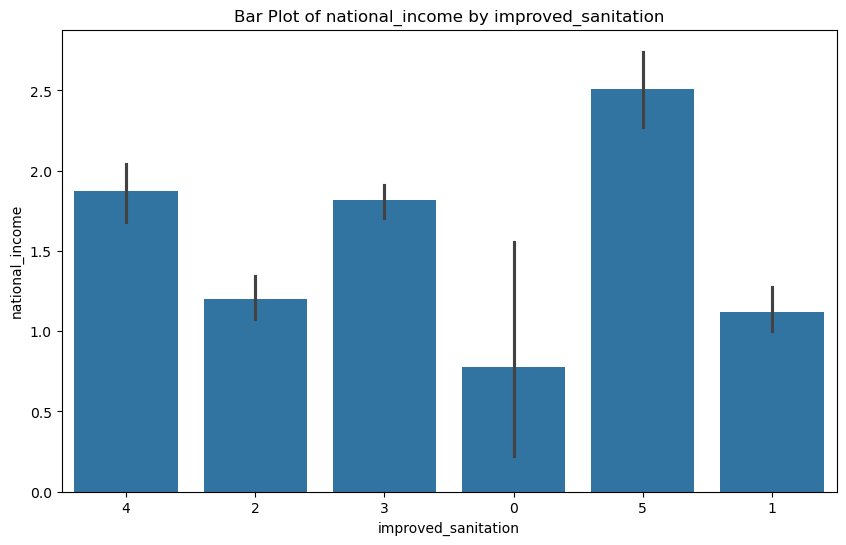

In [1506]:
bar_plot(training_dataset_visualize, 'improved_sanitation', 'national_income')

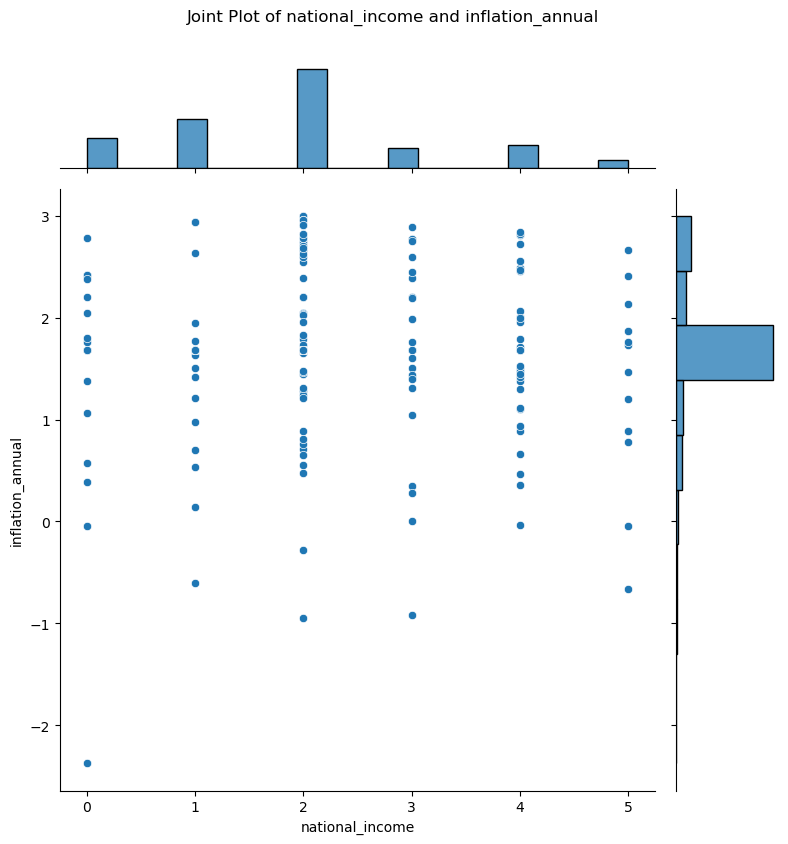

In [1508]:
joint_plot(training_dataset_visualize,'national_income','inflation_annual')

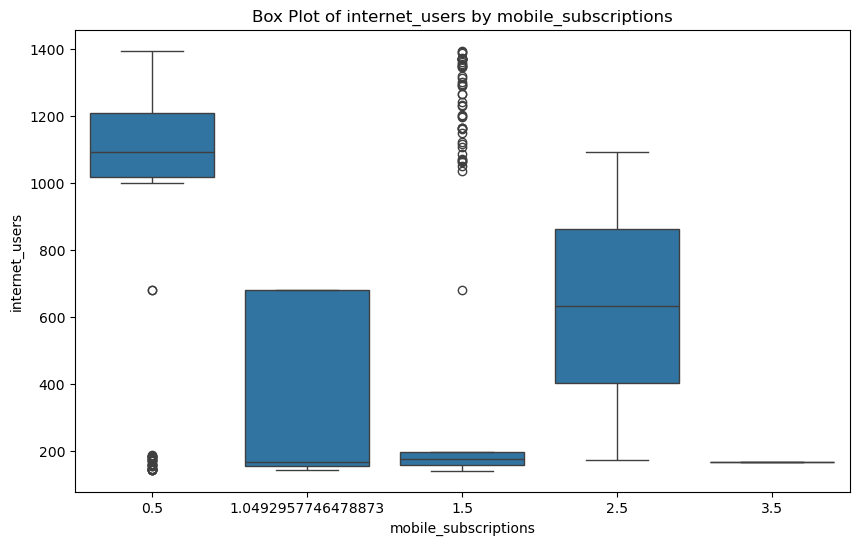

In [1510]:
box_plot(training_dataset_visualize, 'mobile_subscriptions', 'internet_users')

#### Feature Selection with the help of correlation 

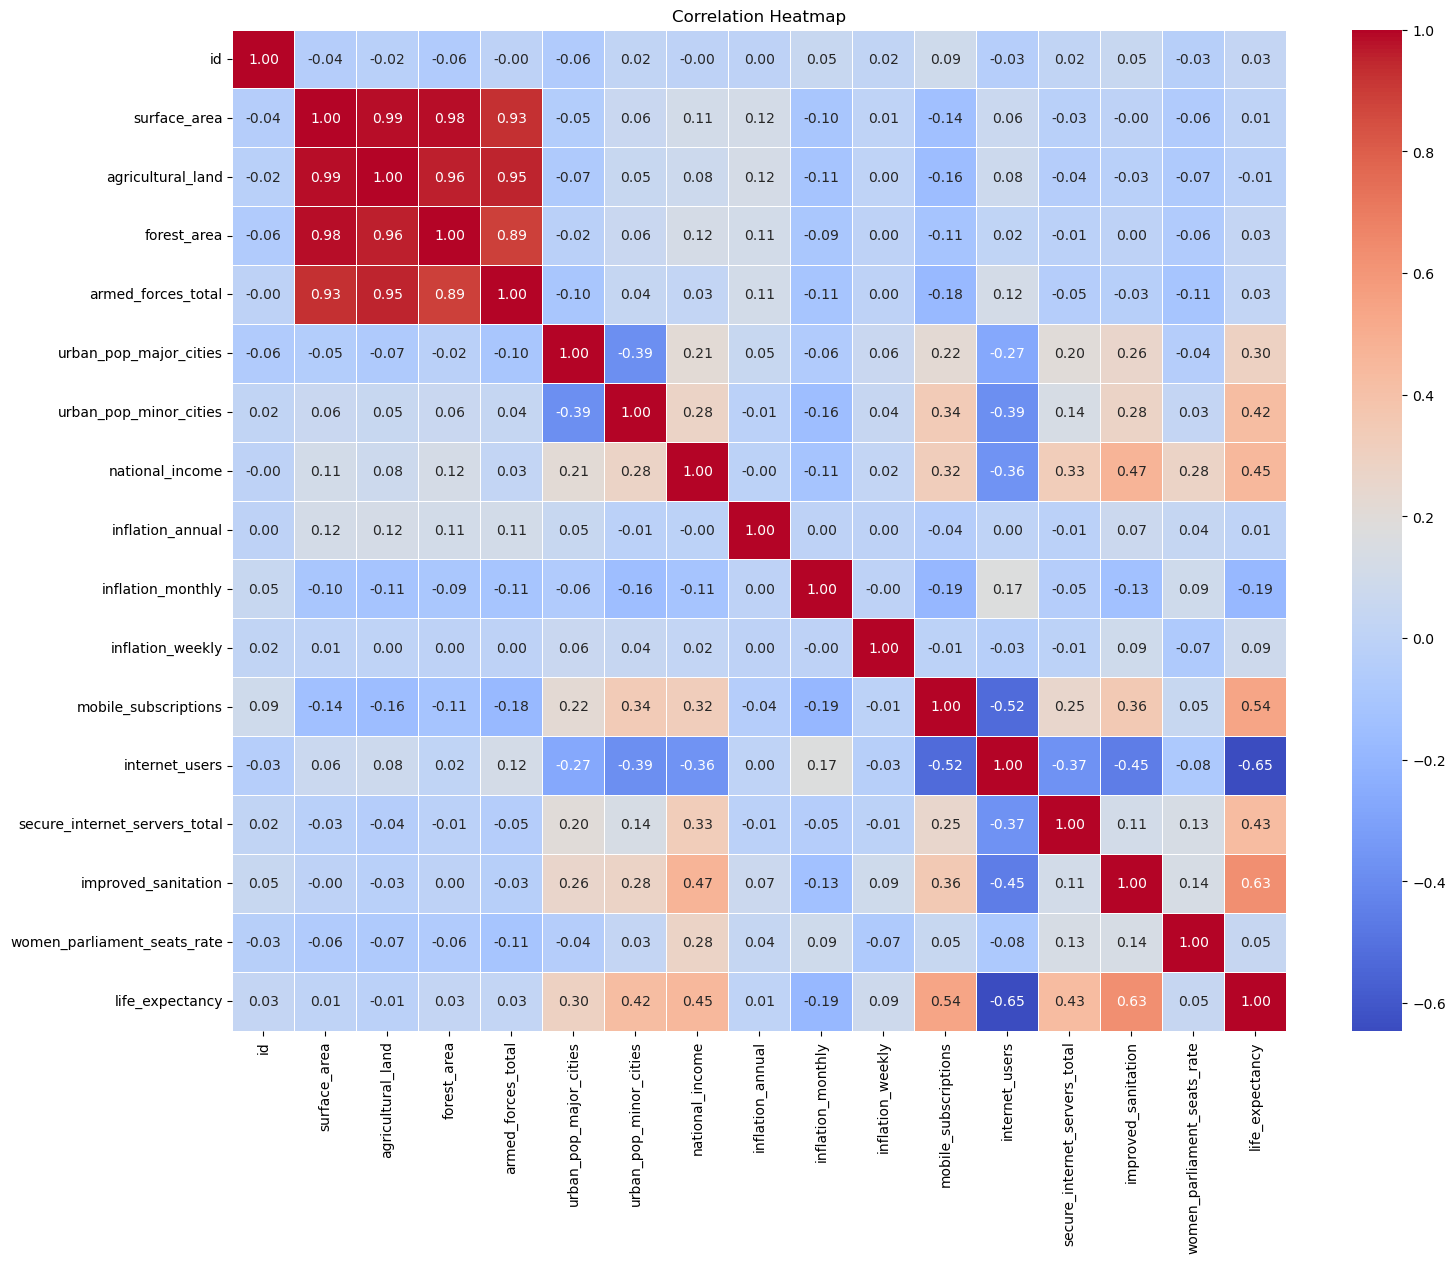

In [1513]:
correlation_heatmap(training_dataset_visualize)

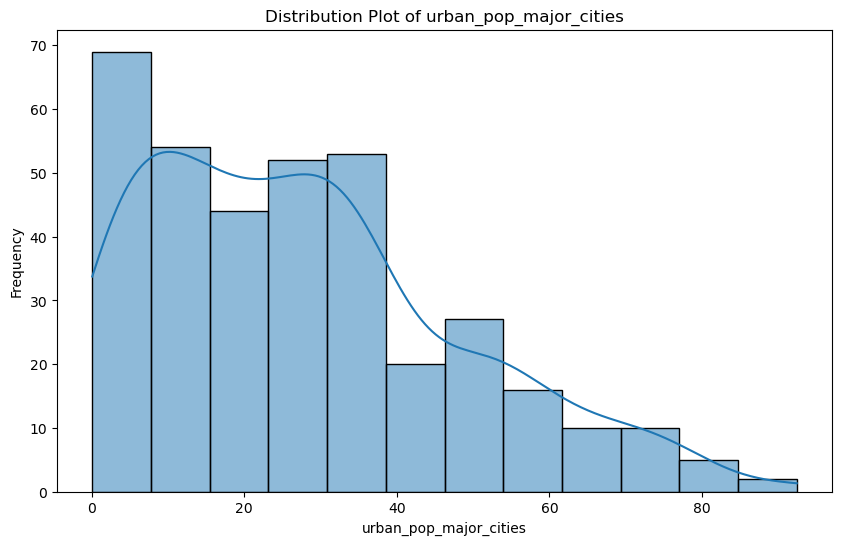

In [1514]:
distribution_plot(training_dataset_visualize, 'urban_pop_major_cities')

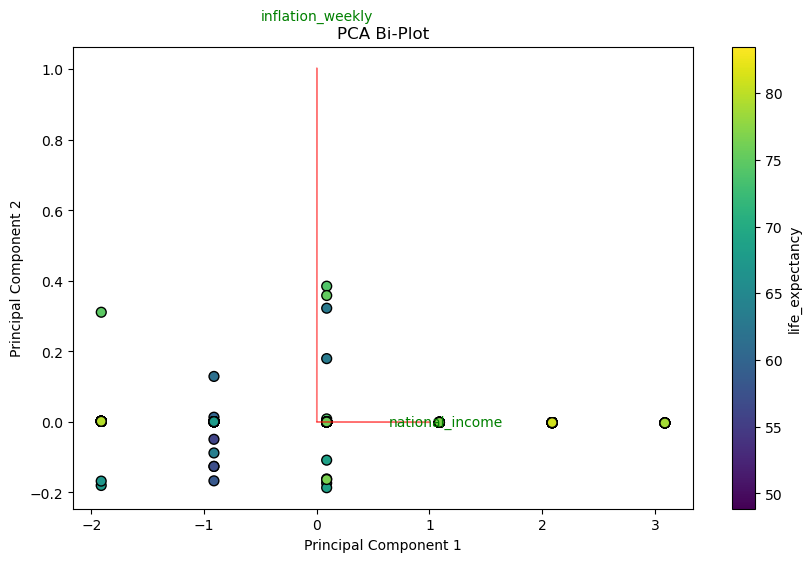

In [1515]:
pca_biplot(training_dataset_visualize, ['national_income', 'inflation_weekly'], 'life_expectancy')